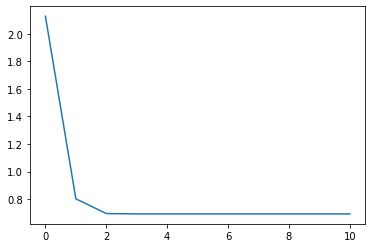

In [14]:
%run hw2.py

Start with [1,1]

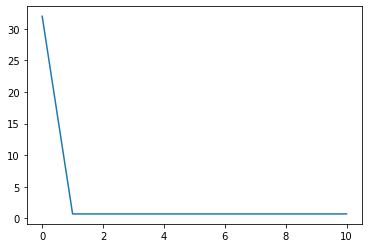

In [5]:
%run hw2.py

Start with 4*[1,1]

I think the resaon that 4*[1,1] provokes more rapidly convergence than [1,1] is that for Newton Method, the direction is downhill and setplength is inverse Hessian matrix multiply the first order deriviation matrix. Since the deriviation at 4 is larger than 1 significantly, the steplength at 4 will be also larger than 1, which indicates the rapid convergence.

# 5.2

In [ ]:
# %load 5.2
import numpy as np
# import the dataset
csvname =  'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]
x=np.log(x)
y=np.log(y)
s=x.shape[1]
col=np.ones((1,s))
x_1=np.r_[col,x]
x_1=x_1.T
x_1=np.mat(x_1)


interations=1000
alpha=0.0001
def model(x,w):
    a=w[0,0]+np.dot(x.T,w[0,1])
    return a.T

def least_squares(w):
    cost=np.sum((model(x,w)-y)**2)
    c=model(x,w)
    return 0.5*cost/float(y.size)

w=np.array([1,1])
w = np.mat(w)
for i in range(interations):
   grad = np.matmul(x_1, w.T)
   minus=grad-y.T
   temp=np.matmul(x_1.T,minus)
   w=w-alpha*temp.T
   cost=least_squares(w)


print('w:',w.T)





In [8]:
%run 5.2

w: [[6.81473477]
 [0.6528121 ]]


5.2 (b) $y=e^{6.815}*x^{0.653}$

5.2 (c) $e^{6.815}*10^{0.653}/4.18=980.026 Kilo Calories$

# 5.9

Boston Housing

In [ ]:
# %load 5.9.py
import numpy as np
# import the dataset
csvname =  'boston_housing.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]

s=x.shape[0]
mean=np.zeros(s)
std=np.zeros(s)
for i in range (np.shape(x)[0]):
    mean[i]=np.mean(x[i,:])
    std[i]=np.std(x[i,:])

for i in range(np.shape(x)[0]):
    x[i,:]=(x[i,:]-mean[i])/std[i]


q=x.shape[1]
col=np.ones((1,q))
x_1=np.r_[col,x]
x_1=x_1
x_1=np.mat(x_1)
interations=100
alpha=0.0001
def model(x,w):
    a=np.matmul(w,x_1)
    return a.T

def least_squares(w):
    temp=model(x_1,w)-y.T
    cost=np.matmul(temp.T,temp)
    return cost/float(y.size)

def mad(w):
    temp = model(x_1, w) - y.T
    mad = np.sum(np.abs(temp))
    return mad / float(y.size)

w=np.zeros((1,(s+1)))
w = np.mat(w)

for i in range(interations):
   grad = np.matmul(w,x_1)
   minus=grad.T-y.T
   temp=np.matmul(x_1,minus)
   w=w-alpha*temp.T
   cost=least_squares(w)

print('RMSE:',np.sqrt(cost))
print('MAD:',mad(w))





In [10]:
%run 5.9.py

RMSE: [[4.7616184]]
MAD: 3.2273132781706195


Automobile

In [ ]:
# %load automobile.py
import numpy as np
# import the dataset
csvname =  'auto_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]

s=x.shape[0]
mean=np.zeros(s)
std=np.zeros(s)
for i in range (np.shape(x)[0]):
    mean[i]=np.mean(x[i,:])
    std[i]=np.std(x[i,:])

for i in range(np.shape(x)[0]):
    x[i,:]=(x[i,:]-mean[i])/std[i]


q=x.shape[1]
col=np.ones((1,q))
x_1=np.r_[col,x]
x_1=x_1
x_1=np.mat(x_1)
interations=100
alpha=0.001
def model(x,w):
    a=np.matmul(w,x_1)
    return a.T

def least_squares(w):
    temp=model(x_1,w)-y.T
    cost=np.matmul(temp.T,temp)
    return cost/float(y.size)

def mad(w):
    temp = model(x_1, w) - y.T
    mad = np.sum(np.abs(temp))
    return mad / float(y.size)

w=np.zeros((1,(s+1)))
w = np.mat(w)

for i in range(interations):
   grad = np.matmul(w,x_1)
   minus=grad.T-y.T
   temp=np.matmul(x_1,minus)
   w=w-alpha*temp.T
   cost=least_squares(w)


print('RMSE:',np.sqrt(cost))
print('MAD:',mad(w))





In [12]:
%run automobile.py

RMSE: [[3.29884191]]
MAD: 2.493448363932387
